In [16]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col = 0)

In [3]:
print(data.head())
print(data.tail())
print(data.shape)

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
        TV  radio  newspaper  sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4
(200, 4)


/Users/dkomlen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


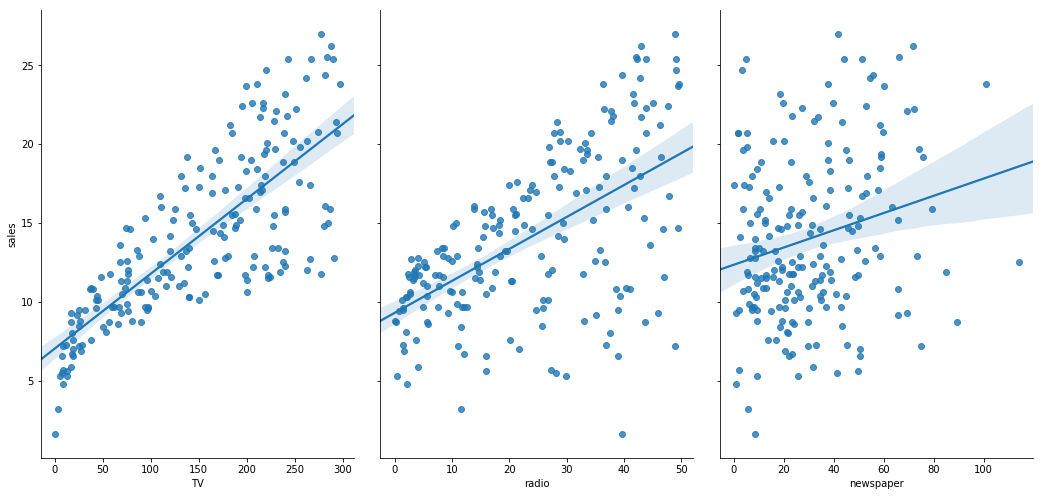

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data, x_vars = ["TV", "radio", "newspaper"], y_vars = "sales", height = 7, aspect = 0.7, kind = "reg")
plt;


In [7]:
feature_cols = ["TV", "radio", "newspaper"]
X = data[feature_cols] # subset original dataframe
print(X.head)
print(X.shape)
print(type(X))

<bound method NDFrame.head of         TV  radio  newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
6      8.7   48.9       75.0
7     57.5   32.8       23.5
8    120.2   19.6       11.6
9      8.6    2.1        1.0
10   199.8    2.6       21.2
11    66.1    5.8       24.2
12   214.7   24.0        4.0
13    23.8   35.1       65.9
14    97.5    7.6        7.2
15   204.1   32.9       46.0
16   195.4   47.7       52.9
17    67.8   36.6      114.0
18   281.4   39.6       55.8
19    69.2   20.5       18.3
20   147.3   23.9       19.1
21   218.4   27.7       53.4
22   237.4    5.1       23.5
23    13.2   15.9       49.6
24   228.3   16.9       26.2
25    62.3   12.6       18.3
26   262.9    3.5       19.5
27   142.9   29.3       12.6
28   240.1   16.7       22.9
29   248.8   27.1       22.9
30    70.6   16.0       40.8
..     ...    ...        ...
171   50.0   11.6       18.4
172  164.5   

In [8]:
y = data['sales']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linreg = LinearRegression()
linreg.fit(X_train, y_train) # learn the coefficients
print(linreg.intercept_) # print the intercept and coefficients
print(linreg.coef_)
print(list(zip(feature_cols, linreg.coef_))) 

2.8769666223179318
[0.04656457 0.17915812 0.00345046]
[('TV', 0.04656456787415028), ('radio', 0.17915812245088836), ('newspaper', 0.0034504647111804347)]


In [12]:
y_pred = linreg.predict(X_test)
print(y_pred)

[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]


In [17]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


In [18]:
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888
